Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
[Github link to dataset](https://github.com/zalandoresearch/fashion-mnist)

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.2.0


In [4]:
# Loading data into training and test sets.
fashion_mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


0
[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  17  12  13  70 

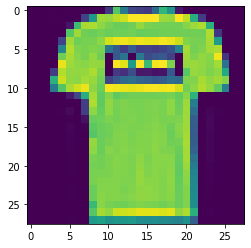

In [5]:
# if u look at the pixel values they look like t-shirt which is labeled as class 0 in the dataset.
np.set_printoptions(linewidth=200)

# plotting the image using matplotlib.
plt.imshow(training_images[1])
print(training_labels[1])
print(training_images[1])
print()

In [6]:
print("Length of training images: ", len(training_images))
print("Length of test images: ", len(test_images))

Length of training images:  60000
Length of test images:  10000


In [7]:
# scaling the pixels in the image to have values between 0 and 1.
training_images=training_images / 255.0
test_images=test_images / 255.0

In [8]:
print("Maximum value of a pixel in an img.", np.max(training_images[0]))
print("Minimum value of a pixel in an img.", np.min(training_images[0]))

Maximum value of a pixel in an img. 1.0
Minimum value of a pixel in an img. 0.0


In [9]:
print("Shape of 1 image in our dataset: ", training_images[0].shape)

Shape of 1 image in our dataset:  (28, 28)


# A simple Neural Network model.

In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model on our training data.
model.fit(training_images, training_labels, epochs=5)

# Evaluating the model using our test data.
# Notice there is a little bit of over fitting in our model to the training data.
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4974 - accuracy: 0.8245
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3726 - accuracy: 0.8658
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3362 - accuracy: 0.8775
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3105 - accuracy: 0.8862
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3467 - accuracy: 0.8792


In [11]:
# Notice the first layer is the input layer it takes a 28x28 image and flattens it into a 1D array of size 1x784
# second layer is a densely connected layer that contains 128 hidden units with an activation function of relu which basically only returs positive values.
# Last layer outputs 10 values as probabilities of an image belonging to 1 of the 10 classes in the dataset using softmax.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# A Convolutional Neural Networks

In [20]:
# Convolution layers passes filters through the image to emphasize important features in an image.
# maxpooling layers are used to compress an image(e.g. if its a (2, 2) pool meaning out of 4 pixels u take the max value of them).

In [28]:
# Loading data into training and test sets.
fashion_mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()


# Reshaping our data for the convolution layer.
training_images=training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

# scaling the pixels in the image to have values between 0 and 1.
training_images=training_images / 255.0
test_images=test_images / 255.0

In [29]:
training_images[0].shapes

(28, 28, 1)

In [32]:
# There are many methods to prevent overfitting: Batch normalization, dropouts, etc.. 
# However I will use early stopping for now.

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.91):
      print("\nReached 91% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4491 - accuracy: 0.8365
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2960 - accuracy: 0.8923
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2487 - accuracy: 0.9075
Epoch 4/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.2173 - accuracy: 0.9194
Reached 91% accuracy so cancelling training!
313/313 [==============================] - 1s 4ms/step - loss: 0.2598 - accuracy: 0.9036


In [35]:
print("Test Accuracy: ", test_metrics[1])

print("Test Loss: ", test_metrics[0])

Test Accuracy:  0.9035999774932861
Test Loss:  0.2598339319229126


In [36]:
# notice the output of the first layer is 26x26x64 26 for the x and y because the most upper, lower, left and right pixels are execluded when using 3x3 filters. and 64 refers to the number of filters.
# second layer outputs the shape of the first layer but quartered using max pooling. x.shape and y.shape were both halved.
# Third and fourth layers doing the same thing as the first two layers.

# fifth, sixth and seventh layers are both the same as the model trained above, but the shape of the flatten layer is different cuz of 5x5x64.
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

# Visualizing the convolutions.

In [37]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4
 2]


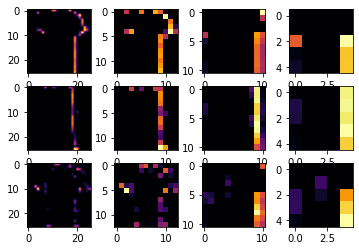

In [52]:
# if u look closely to each of the 3 images I am plotting they are all labeled as shirts in the dataset.
# The model convolves the image in the first layer then compress it in the second layer then convolve it again in third layer and lastly compress it in the fourth layer.
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=19
SECOND_IMAGE=27
THIRD_IMAGE=35
CONVOLUTION_NUMBER = 1

from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)